In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# read market.csv file 
data = pd.read_csv("market.csv", parse_dates=['Date'])
data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
5,1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
6,1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
7,1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
8,1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0
9,1928-01-13 00:00:00-05:00,17.580000,17.580000,17.580000,17.580000,0,0.0,0.0


In [5]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def SimpleLinear(df,lookback_days):
    # --- 1. Filter for Recent Data ---
    # Instead of 90 years, let's use the last 180 days to find the current trend
    # lookback_days = 60
    recent_df = df.tail(lookback_days).copy()
    
    # --- 2. Preprocessing ---
    recent_df['Date_Ordinal'] = recent_df['Date'].map(dt.datetime.toordinal)
    
    # Reshape for sklearn
    X = recent_df[['Date_Ordinal']].values
    y = recent_df['Price'].values
    
    # --- 3. Train the Model on RECENT data only ---
    model = LinearRegression()
    model.fit(X, y)
    
    # --- 4. Predict the next 7 days ---
    last_date = recent_df['Date'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
    future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
    
    predictions = model.predict(future_ordinals)
    
    # --- 5. Visualizing the 'Local' Fit ---
    plt.figure(figsize=(12,6))
    # Plot the last 60 days of actual data
    plt.plot(recent_df['Date'].tail(60), recent_df['Price'].tail(60), label='Actual Price (Last 60 Days)', color='blue')
    # Plot the prediction
    plt.plot(future_dates, predictions, 'ro--', label='7-Day Linear Forecast')
    
    plt.title(f'Linear Regression: Forecast based on last {lookback_days} days')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("7-Day Forecast:")
    for date, price in zip(future_dates, predictions):
        print(f"{date.date()}: ${price:.2f}")

C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\2577968821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Close']


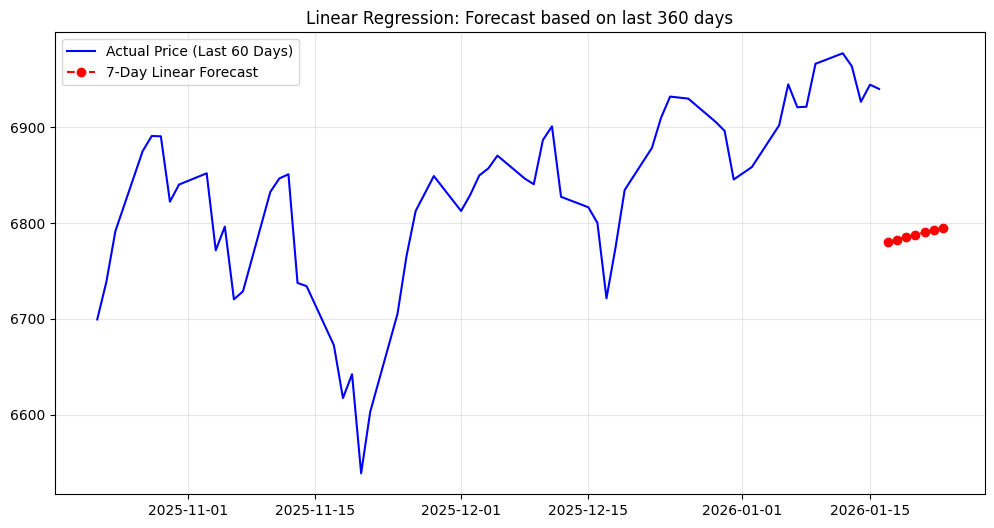

7-Day Forecast:
2026-01-17: $6780.29
2026-01-18: $6782.80
2026-01-19: $6785.31
2026-01-20: $6787.81
2026-01-21: $6790.32
2026-01-22: $6792.83
2026-01-23: $6795.33


In [6]:
# data preparation

df=data[['Date','Close']]
df['Price']=df['Close']
# df.head(10)
SimpleLinear(df,360)

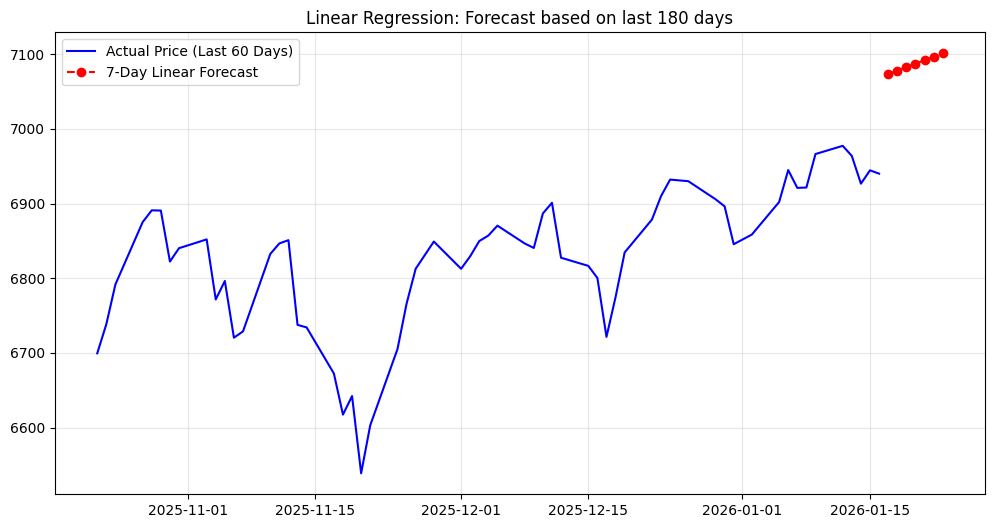

7-Day Forecast:
2026-01-17: $7073.36
2026-01-18: $7078.01
2026-01-19: $7082.65
2026-01-20: $7087.29
2026-01-21: $7091.94
2026-01-22: $7096.58
2026-01-23: $7101.22


In [7]:
SimpleLinear(df,180)

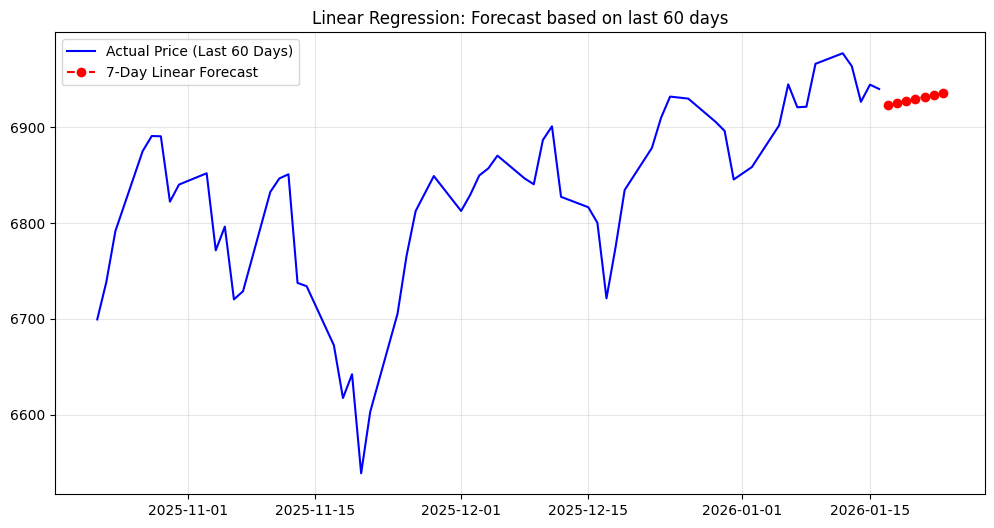

7-Day Forecast:
2026-01-17: $6922.98
2026-01-18: $6925.14
2026-01-19: $6927.29
2026-01-20: $6929.44
2026-01-21: $6931.59
2026-01-22: $6933.75
2026-01-23: $6935.90


In [8]:
SimpleLinear(df,60)

C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\304801698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Ordinal'] = df['Date'].map(dt.datetime.toordinal)
C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\304801698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Lag_1'] = df['Price'].shift(1)
C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\304801698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

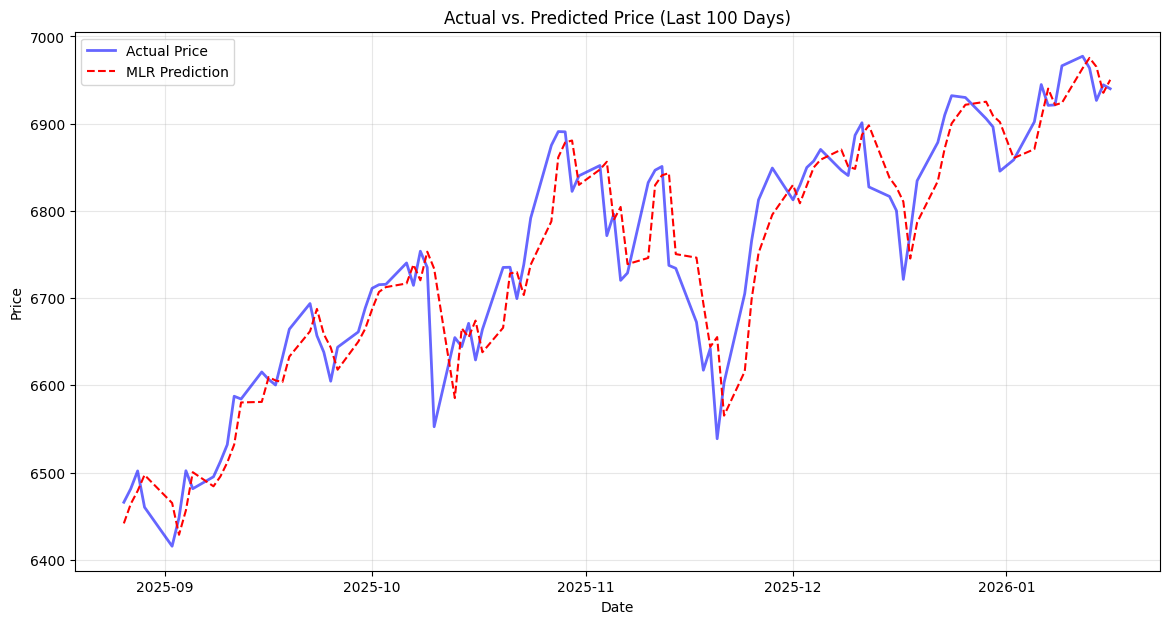

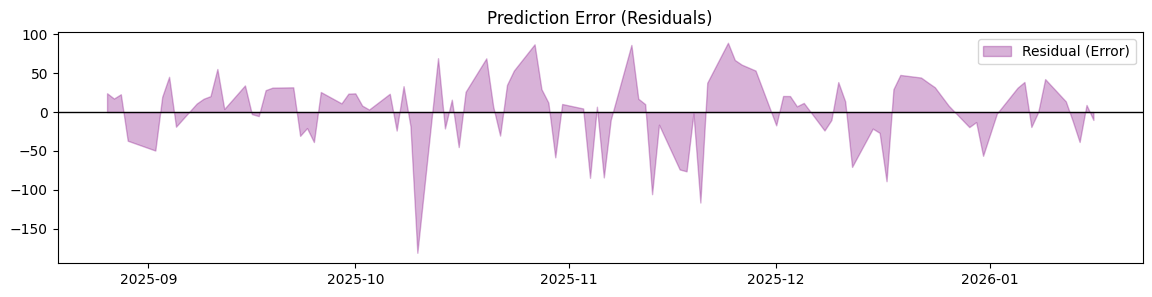

In [10]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- 1. Prepare Features (Assuming 'df' already exists with 'Date' and 'Price') ---
df['Date_Ordinal'] = df['Date'].map(dt.datetime.toordinal)
df['Price_Lag_1'] = df['Price'].shift(1)
df['MA_7'] = df['Price'].rolling(window=7).mean()
df = df.dropna()

# --- 2. Train the Model ---
X = df[['Date_Ordinal', 'Price_Lag_1', 'MA_7']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

# --- 3. Generate Predictions for the Dataset ---
df['Predicted_Price'] = model.predict(X)

# --- 4. Plotting ---
plt.figure(figsize=(14, 7))

# We zoom in on the last 100 days so we can actually see the difference
recent_data = df.tail(100)

plt.plot(recent_data['Date'], recent_data['Price'], 
         label='Actual Price', color='blue', linewidth=2, alpha=0.6)

plt.plot(recent_data['Date'], recent_data['Predicted_Price'], 
         label='MLR Prediction', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual vs. Predicted Price (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Residual Plot (Optional but helpful) ---
# This shows the error: Actual - Predicted
plt.figure(figsize=(14, 3))
plt.fill_between(recent_data['Date'], recent_data['Price'] - recent_data['Predicted_Price'], 
                 color='purple', alpha=0.3, label='Residual (Error)')
plt.axhline(0, color='black', lw=1)
plt.title('Prediction Error (Residuals)')
plt.legend()
plt.show()

NameError: name 'mlr_model' is not defined

C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\399324280.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Close']
C:\Users\Allur\AppData\Local\Temp\ipykernel_22424\399324280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t4']= (df['Close'] + df['Open'] + df['High'] +df['Low'])/4


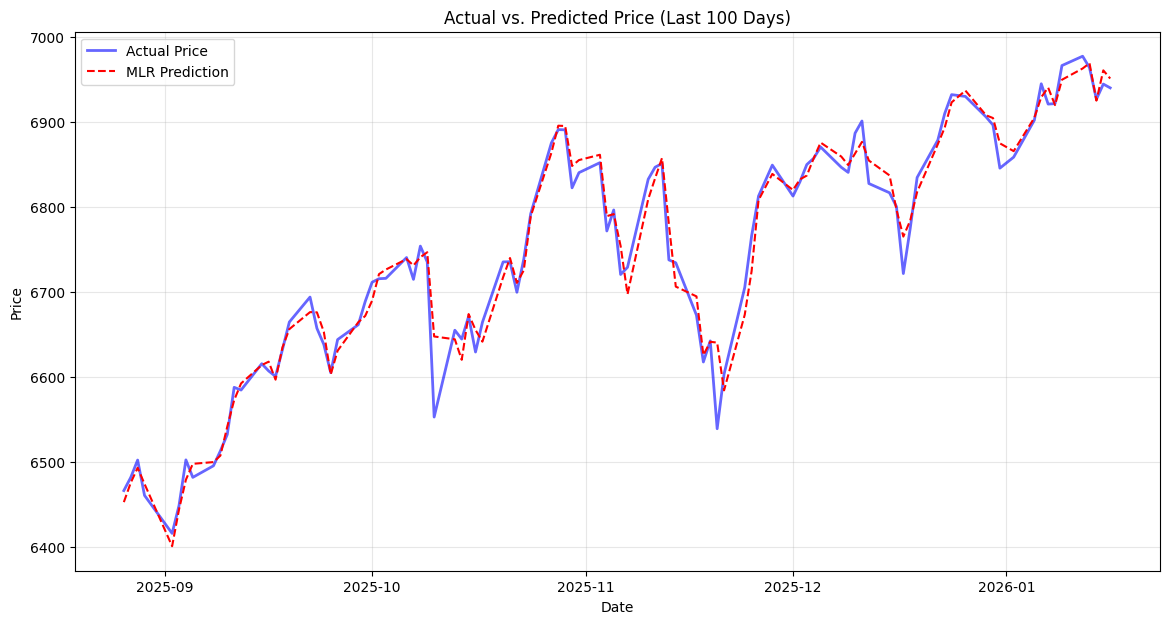

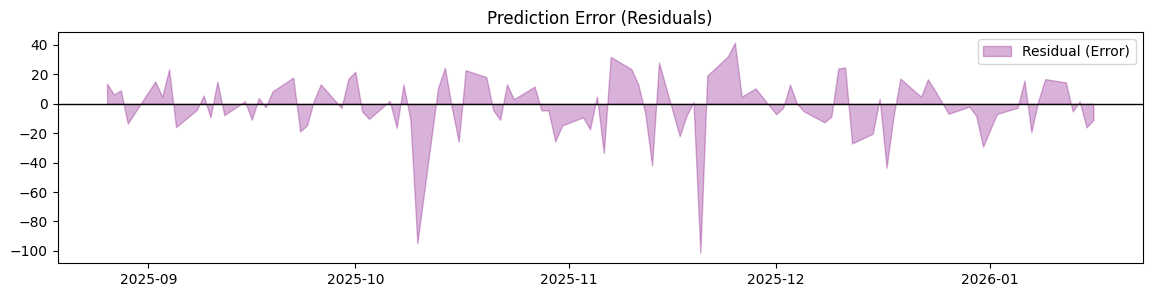

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- 1. Prepare Features (Assuming 'df' already exists with 'Date' and 'Price') 
df=data[['Date', 'Open', 'High', 'Low', 'Close']]

df['Price']=df['Close']
df['t4']= (df['Close'] + df['Open'] + df['High'] +df['Low'])/4
df['range']= ( df['High'] - df['Low'])


df['Date_Ordinal'] = df['Date'].map(dt.datetime.toordinal)
df = df.dropna()

# --- 2. Train the Model ---
X = df[['Date_Ordinal', 't4', 'range']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

# --- 3. Generate Predictions for the Dataset ---
df['Predicted_Price'] = model.predict(X)

# --- 4. Plotting ---
plt.figure(figsize=(14, 7))

# We zoom in on the last 100 days so we can actually see the difference
recent_data = df.tail(100)

plt.plot(recent_data['Date'], recent_data['Price'], 
         label='Actual Price', color='blue', linewidth=2, alpha=0.6)

plt.plot(recent_data['Date'], recent_data['Predicted_Price'], 
         label='MLR Prediction', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual vs. Predicted Price (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Residual Plot (Optional but helpful) ---
# This shows the error: Actual - Predicted
plt.figure(figsize=(14, 3))
plt.fill_between(recent_data['Date'], recent_data['Price'] - recent_data['Predicted_Price'], 
                 color='purple', alpha=0.3, label='Residual (Error)')
plt.axhline(0, color='black', lw=1)
plt.title('Prediction Error (Residuals)')
plt.legend()
plt.show()